# A Straightforward Example for Cross-Correlation Spectra
Read this only after, you have read __A Straightforward Example for Auto-Correlation Spectra__ and __Calculating Spectra with Negative Frequencies__. 
The whole code would make more sense!

Everything stays the same up to `SpectrumConfig`.

In [1]:
from MultiChSS_SpectrumConfig import SpectrumConfig, DataImportConfig
from MultiChSS_SpectrumCalculator import SpectrumCalculator
from MultiChSS_CrossConfig import CrossConfig
from MultiChSS_PlotConfig import PlotConfig
from MultiChSS_SpectrumPlotter import SpectrumPlotter

import numpy as np
import matplotlib.pyplot as plt

In [3]:
data1=np.load('/Users/armin/sciebo/AG Spektroskopie Projektbox/4Armin/PhDProjects/SignalSnapPaper/long_simulation.npz')
x = data1['x'][0:1000000000]
m = data1['m'][0:1000000000]

In [4]:
config1 = DataImportConfig(data=x)
config2 = DataImportConfig(data=m)
selected_data = [0,1] # because we want to evaluate both arrays. 
                      # If only one was of interest, we could have used selected_data = [0]

Now to calculate the cross-correlation spectrum, we look at `CrossConfig` more closely! Also keep in mind that to extract the whole information out of the cross-correlation sprectra negative frequencies are important to be included in the evaluation!

Until now, the only parameter in `CrossConfig` was `auto_corr`. Here, we introduce `cross_corr_2`, `cross_corr_3` and `cross_corr_4`.
All of these parameters are a list of tuples! In the tuples you can specify which data combination you want.  
In this specific example we put `auto_corr=False` but it is not necessary. You can ablsolutely calculate auto-correlation and cross-correlations in one go!

Let's calculate both possible combinations for second order spectrum, namely, $S^{(2)}_{xm}$ and $S^{(2)}_{mx}$. The indices for $x$ and $m$ are $0$ and $1$ respectively. Meaning that to calculate $S^{(2)}_{xm}$ we need `(0, 1)` and for $S^{(2)}_{mx}$ `(1, 0)` in a list. Together they make `cross_corr_2=[(0, 1), (1, 0)]`. For `cross_corr_3` and `cross_corr_4` every tuple must have $3$ and $4$ elements.

In [7]:
sconfig = SpectrumConfig(dt=0.001, f_min=-5, f_max=5, s3_calc='1/4',f_unit='MHz', backend='mps', order_in=[1, 2, 4], spectrum_size=1000, 
                         show_first_frame=True)

cconfig = CrossConfig(auto_corr=False, cross_corr_2=[(0, 1), (1, 0)],
                     cross_corr_4=[(1, 0, 0, 1), (1, 1, 0, 0)])

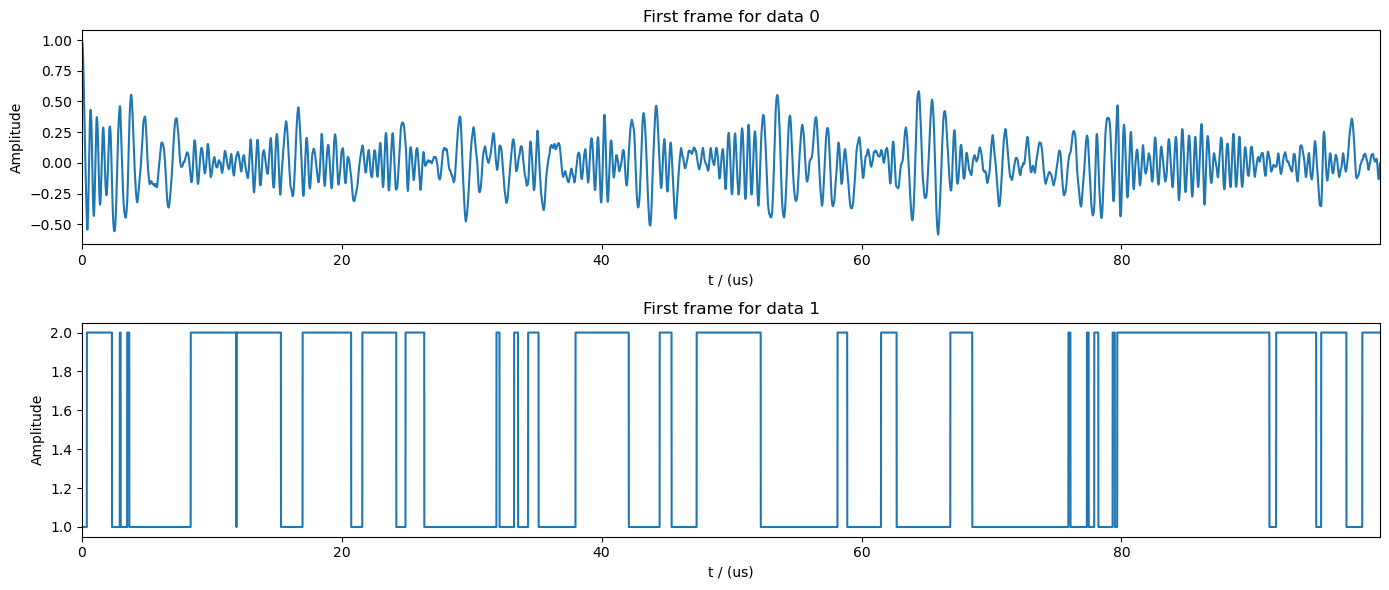

  0%|          | 0/1001 [00:00<?, ?it/s]

In [9]:
scalc = SpectrumCalculator(sconfig, cconfig, [config1, config2], selected=selected_data)
scalc.calc_spec();

No results available for order 1.


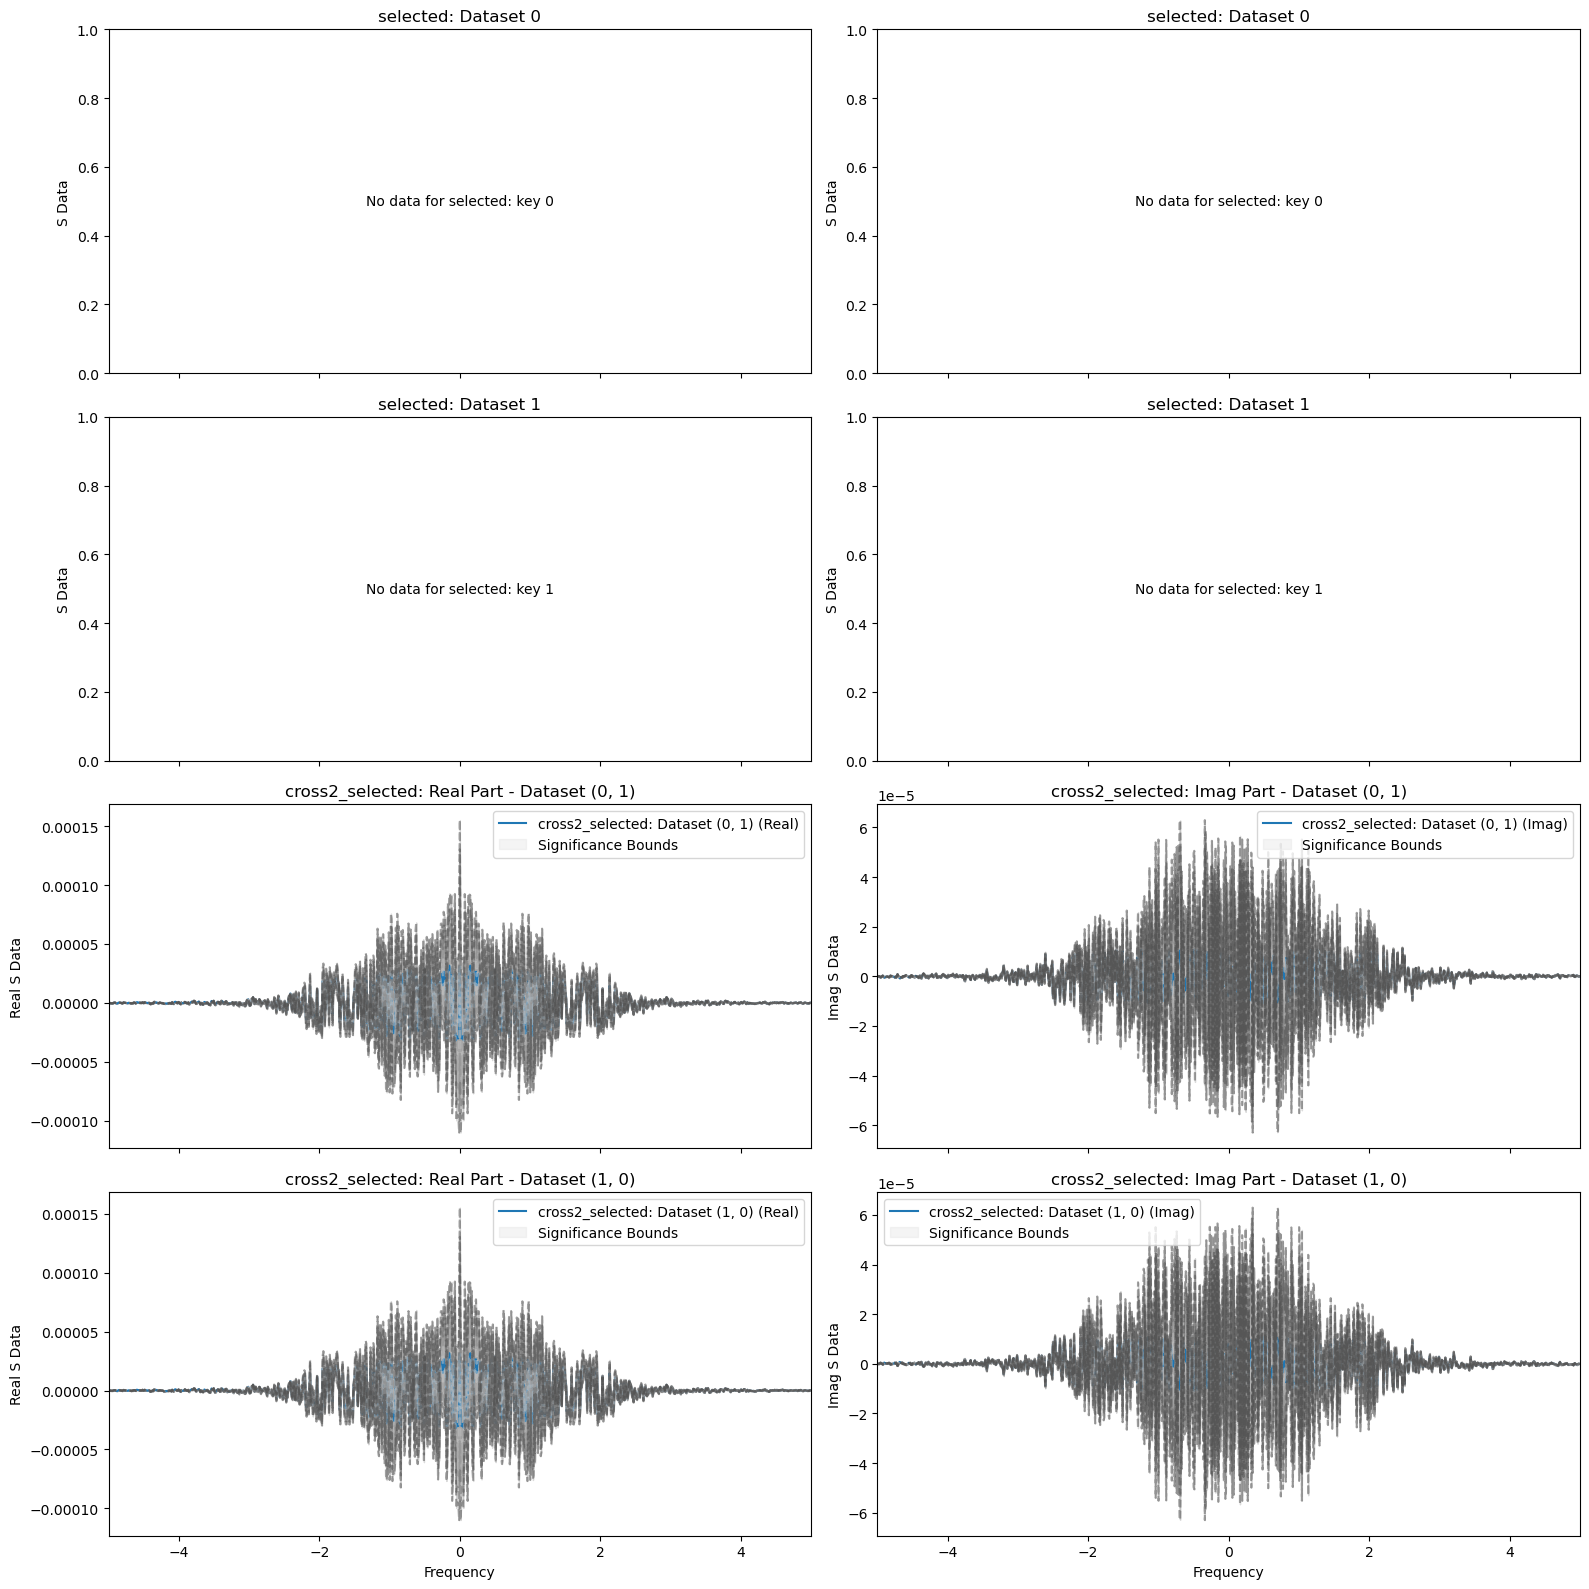


S2 Scaling Information:
+----------------+--------------+
| Arcsinh Scaled | Scale Factor |
+----------------+--------------+
|      True      |     0.02     |
+----------------+--------------+
No normal order 4 data available.


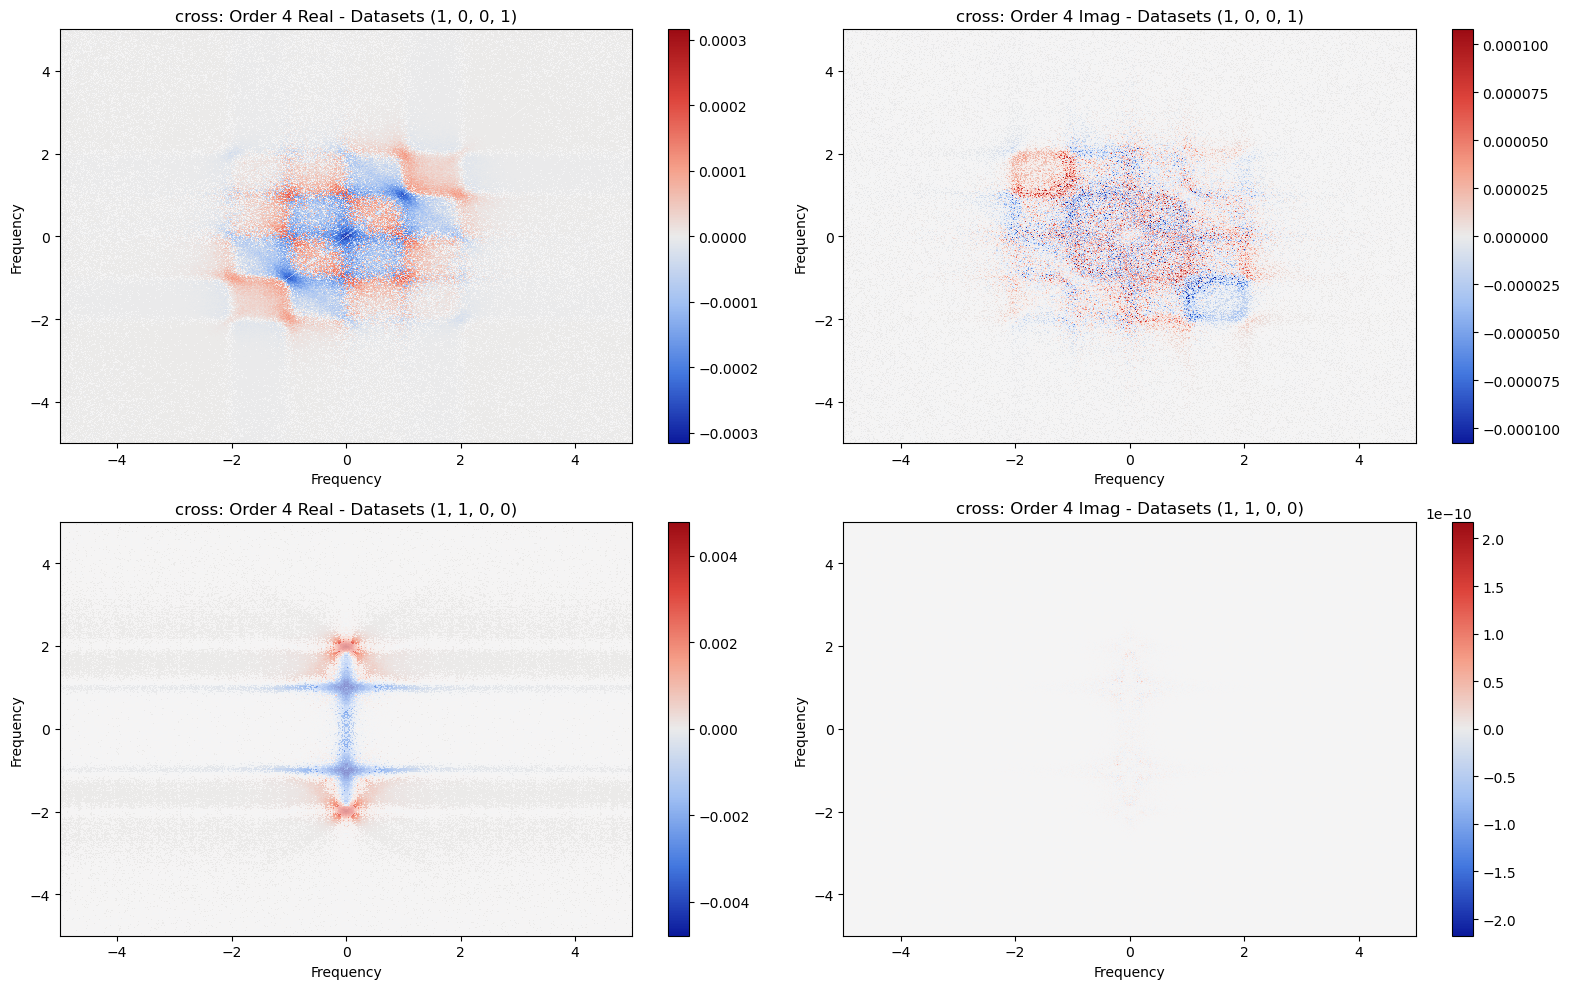


S4 Scaling Information (Cross):
+----------------+--------------+
| Arcsinh Scaled | Scale Factor |
+----------------+--------------+
|      True      |     0.02     |
+----------------+--------------+


In [11]:
pconfig = PlotConfig(f_min=-5, f_max=5, display_orders=[1, 2, 4], significance=5, arcsinh_scale=(True, 0.02),
                     plot_format=['re', 'im'], insignif_transparency=0.5)
plotter = SpectrumPlotter(sconfig, cconfig, scalc, pconfig)
plotter.display()

and now for the third order

In [42]:
sconfig = SpectrumConfig(dt=0.001, f_min=0, f_max=5, s3_calc='1/2',f_unit='MHz', backend='mps', order_in=[3], spectrum_size=1000, 
                         show_first_frame=False)

cconfig = CrossConfig(auto_corr=False, cross_corr_3=[(0, 1, 1), (1, 0, 0), (0, 0, 1)])

In [44]:
scalc = SpectrumCalculator(sconfig, cconfig, [config1, config2], selected=selected_data)
scalc.calc_spec();

  0%|          | 0/500 [00:00<?, ?it/s]

No results available for order 1.
No normal order 3 data available.


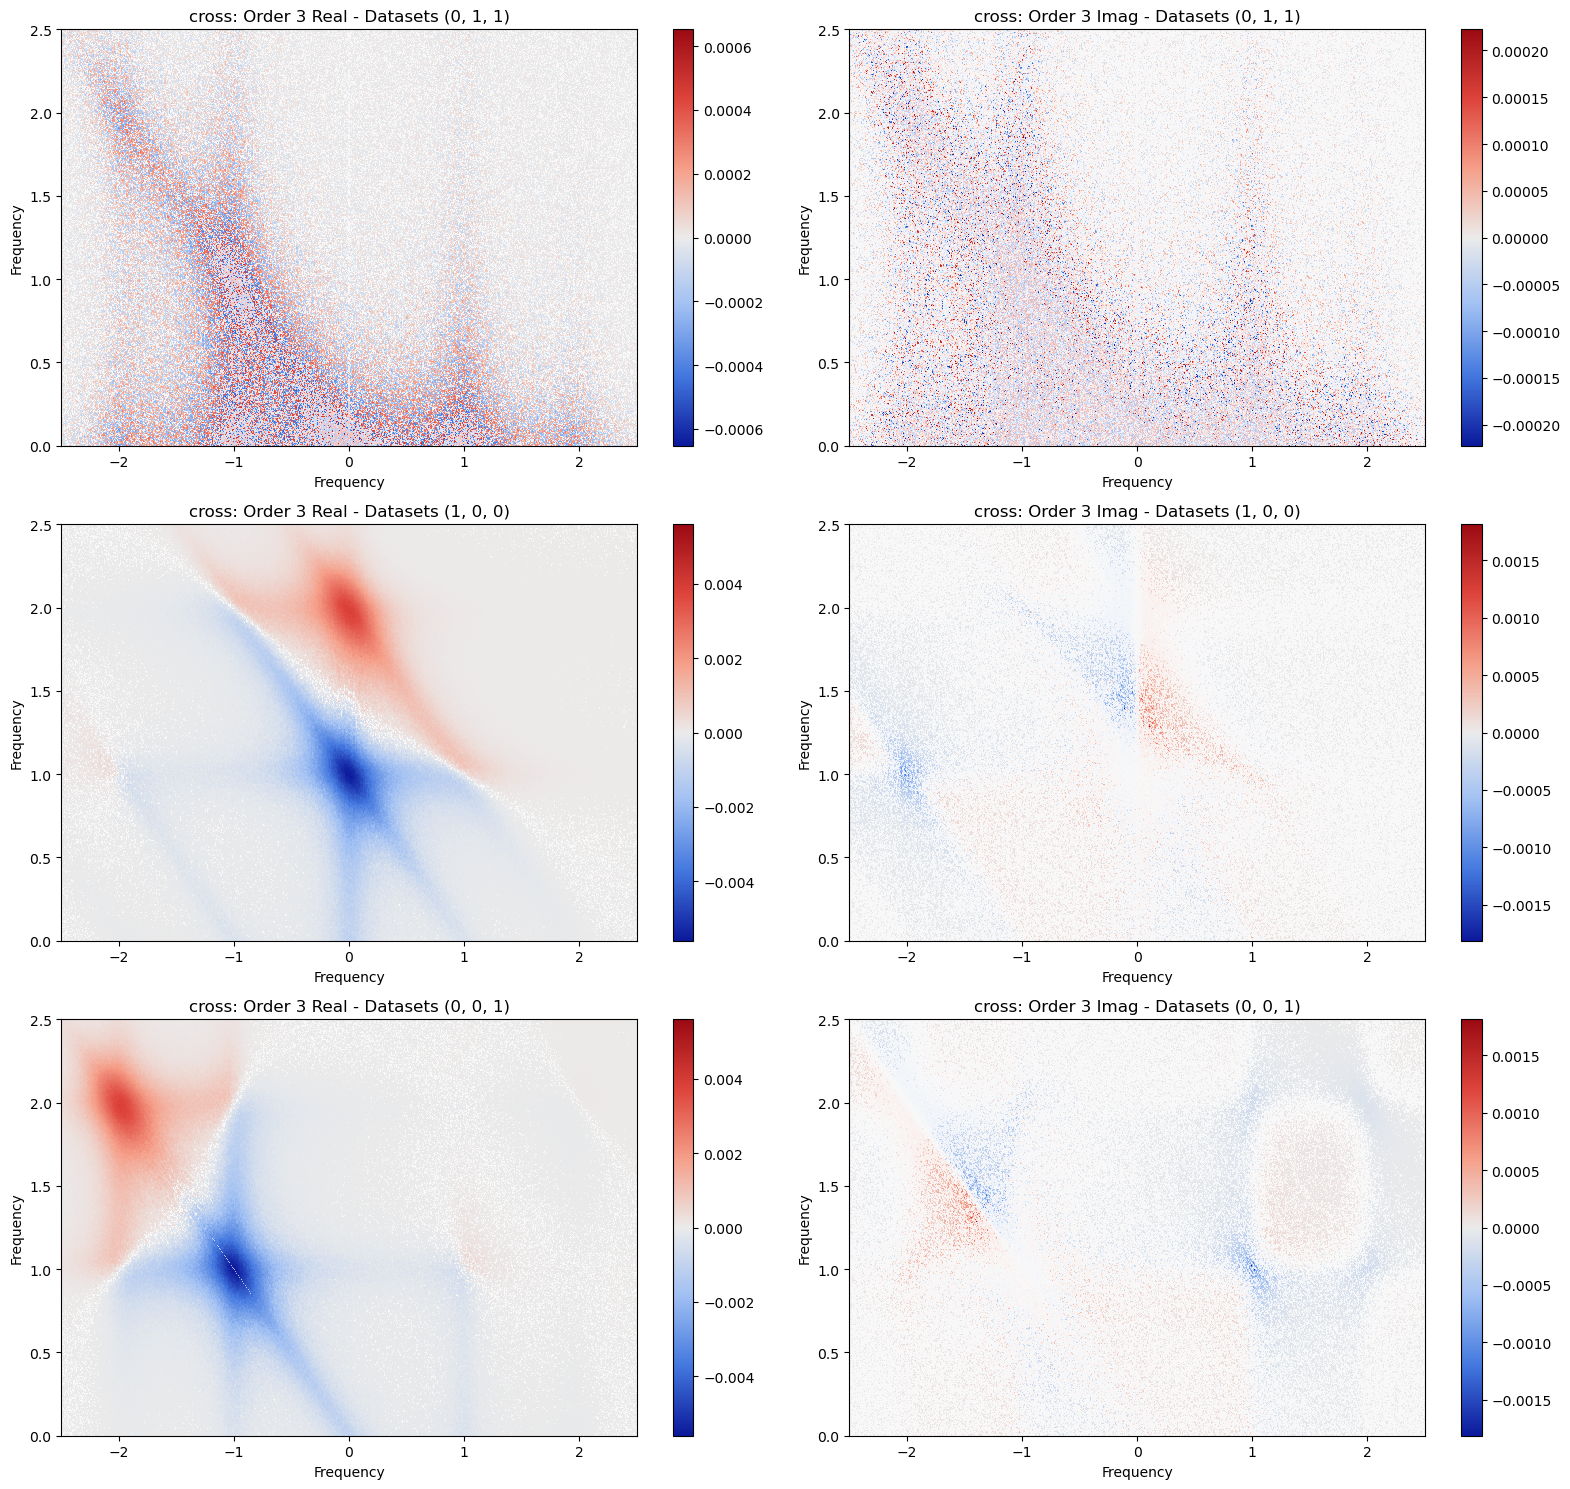


S3 Scaling Information (Cross):
+----------------+--------------+
| Arcsinh Scaled | Scale Factor |
+----------------+--------------+
|      True      |     0.02     |
+----------------+--------------+


In [48]:
pconfig = PlotConfig(f_min=-5, f_max=5, display_orders=[3], significance=5, arcsinh_scale=(True, 0.02),
                     plot_format=['re', 'im'], insignif_transparency=0.7)
plotter = SpectrumPlotter(sconfig, cconfig, scalc, pconfig)
plotter.display()

The reason why we separated the calculation for the third order from second and fourth order is that negative frequencies are necessary when it comes to cross-correlation spectra and as already established the third order goes through a different kind of numerical calculation for more efficiency. 